In [2]:
import requests

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
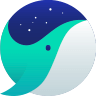
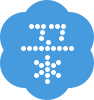

In [3]:
requests.get('https://naver.com').text

In [4]:
endpoint = 'https://labuser17computervision.cognitiveservices.azure.com/'
key = '5ff29eff189a464ba4366c5f7137fe51'

In [5]:
endpoint = endpoint + 'vision/v2.0/'

In [6]:
analysisEndpoint = endpoint + 'analyze'

In [7]:
from PIL import Image
from io import BytesIO

In [8]:
image_url = 'https://www.southernmallee.sa.gov.au/__data/assets/image/0019/132625/cat_and_dog.jpg'

In [9]:
image = Image.open(BytesIO(requests.get(image_url).content))

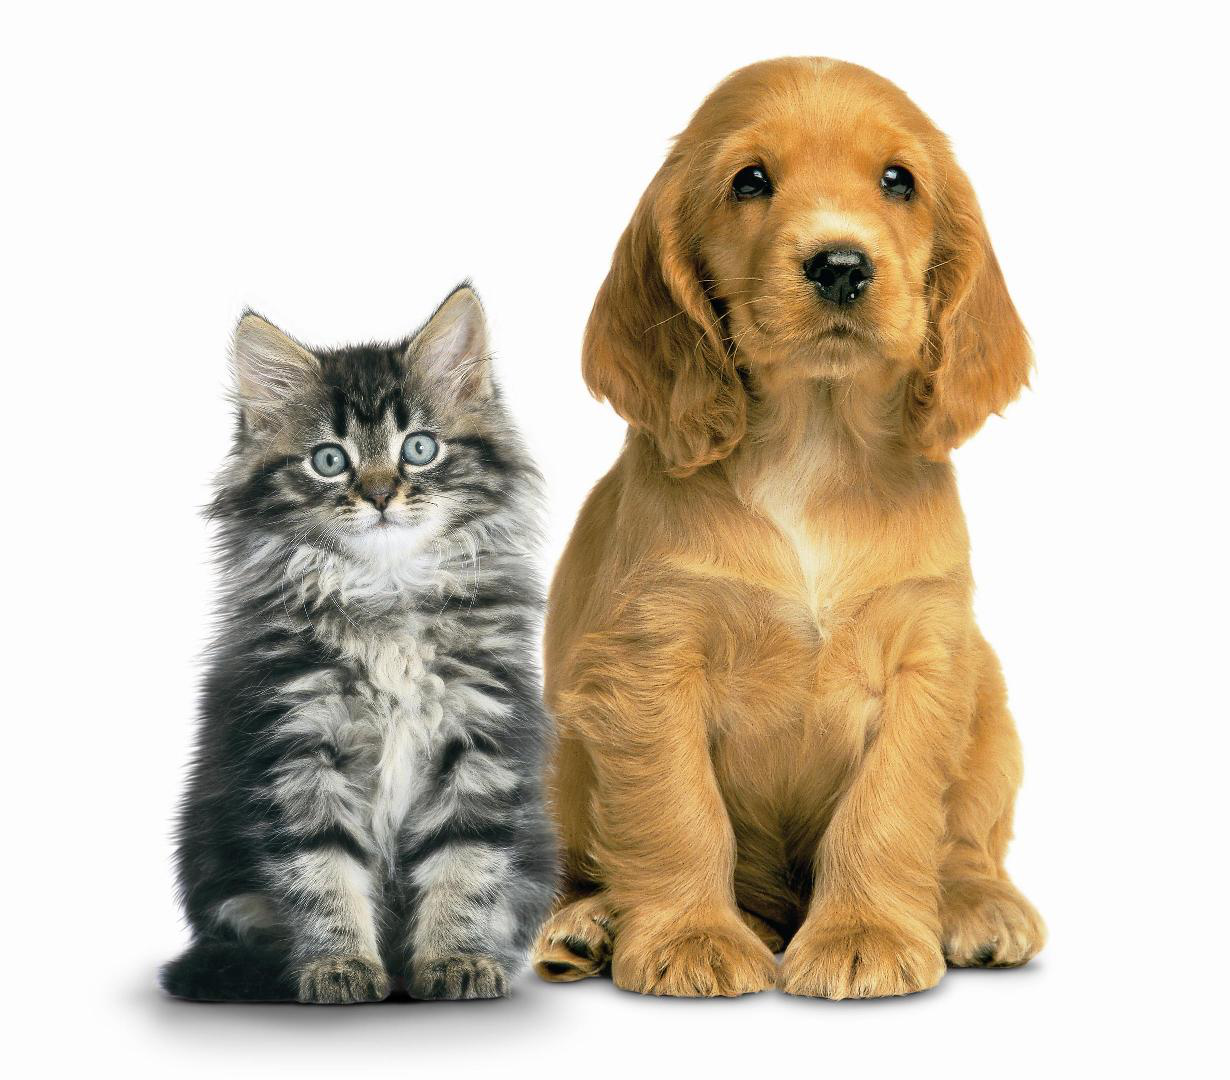

In [10]:
image

In [11]:
headers = {'Ocp-Apim-Subscription-Key': key}
params = {'visualFeatures':'Categories,Description,Color'}
data = {'url':image_url}

In [12]:
response = requests.post(analysisEndpoint,
                         headers = headers,
                         params = params,
                         json = data)

In [13]:
result = response.json()
result

{'categories': [{'name': 'animal_dog', 'score': 0.99609375}],
 'color': {'dominantColorForeground': 'White',
  'dominantColorBackground': 'White',
  'dominantColors': ['White'],
  'accentColor': 'A0742B',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['cat',
   'sitting',
   'brown',
   'animal',
   'indoor',
   'mammal',
   'dog',
   'looking',
   'front',
   'laying',
   'large',
   'standing'],
  'captions': [{'text': 'a large brown dog sitting next to a cat',
    'confidence': 0.7813200869077456}]},
 'requestId': '8625ada8-6d72-4810-8bca-97596c59bdd2',
 'metadata': {'height': 1080, 'width': 1230, 'format': 'Jpeg'}}

In [15]:
result['description']['captions']

[{'text': 'a large brown dog sitting next to a cat',
  'confidence': 0.7813200869077456}]

In [16]:
result['description']['captions'][0]['text']

'a large brown dog sitting next to a cat'

In [17]:
detectEndpoint = endpoint + 'detect'

In [18]:
headers = {'Ocp-Apim-Subscription-key': key}
params = {}
data = {'url': image_url}

In [19]:
response = requests.post(detectEndpoint,
                         headers=headers,
                         params=params,
                         json=data)

In [20]:
result = response.json()

In [21]:
result

{'objects': [{'rectangle': {'x': 534, 'y': 48, 'w': 535, 'h': 965},
   'object': 'golden retriever',
   'confidence': 0.663,
   'parent': {'object': 'retriever',
    'confidence': 0.755,
    'parent': {'object': 'dog',
     'confidence': 0.896,
     'parent': {'object': 'mammal',
      'confidence': 0.932,
      'parent': {'object': 'animal', 'confidence': 0.932}}}}},
  {'rectangle': {'x': 167, 'y': 274, 'w': 407, 'h': 750},
   'object': 'cat',
   'confidence': 0.909,
   'parent': {'object': 'mammal',
    'confidence': 0.915,
    'parent': {'object': 'animal', 'confidence': 0.915}}}],
 'requestId': '55ced864-995f-4872-a0f4-2cc681b78639',
 'metadata': {'height': 1080, 'width': 1230, 'format': 'Jpeg'}}

In [22]:
from PIL import Image, ImageDraw, ImageFont

In [29]:
def MakeRectangle(result):
  objects = result['objects']

  for obj in objects:
    print(obj)

    rect = obj['rectangle']
    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']

    draw.rectangle(((x, y), (x+w, y+h)), outline='red')

In [30]:
draw = ImageDraw.Draw(image)
MakeRectangle(result)

{'rectangle': {'x': 534, 'y': 48, 'w': 535, 'h': 965}, 'object': 'golden retriever', 'confidence': 0.663, 'parent': {'object': 'retriever', 'confidence': 0.755, 'parent': {'object': 'dog', 'confidence': 0.896, 'parent': {'object': 'mammal', 'confidence': 0.932, 'parent': {'object': 'animal', 'confidence': 0.932}}}}}
{'rectangle': {'x': 167, 'y': 274, 'w': 407, 'h': 750}, 'object': 'cat', 'confidence': 0.909, 'parent': {'object': 'mammal', 'confidence': 0.915, 'parent': {'object': 'animal', 'confidence': 0.915}}}


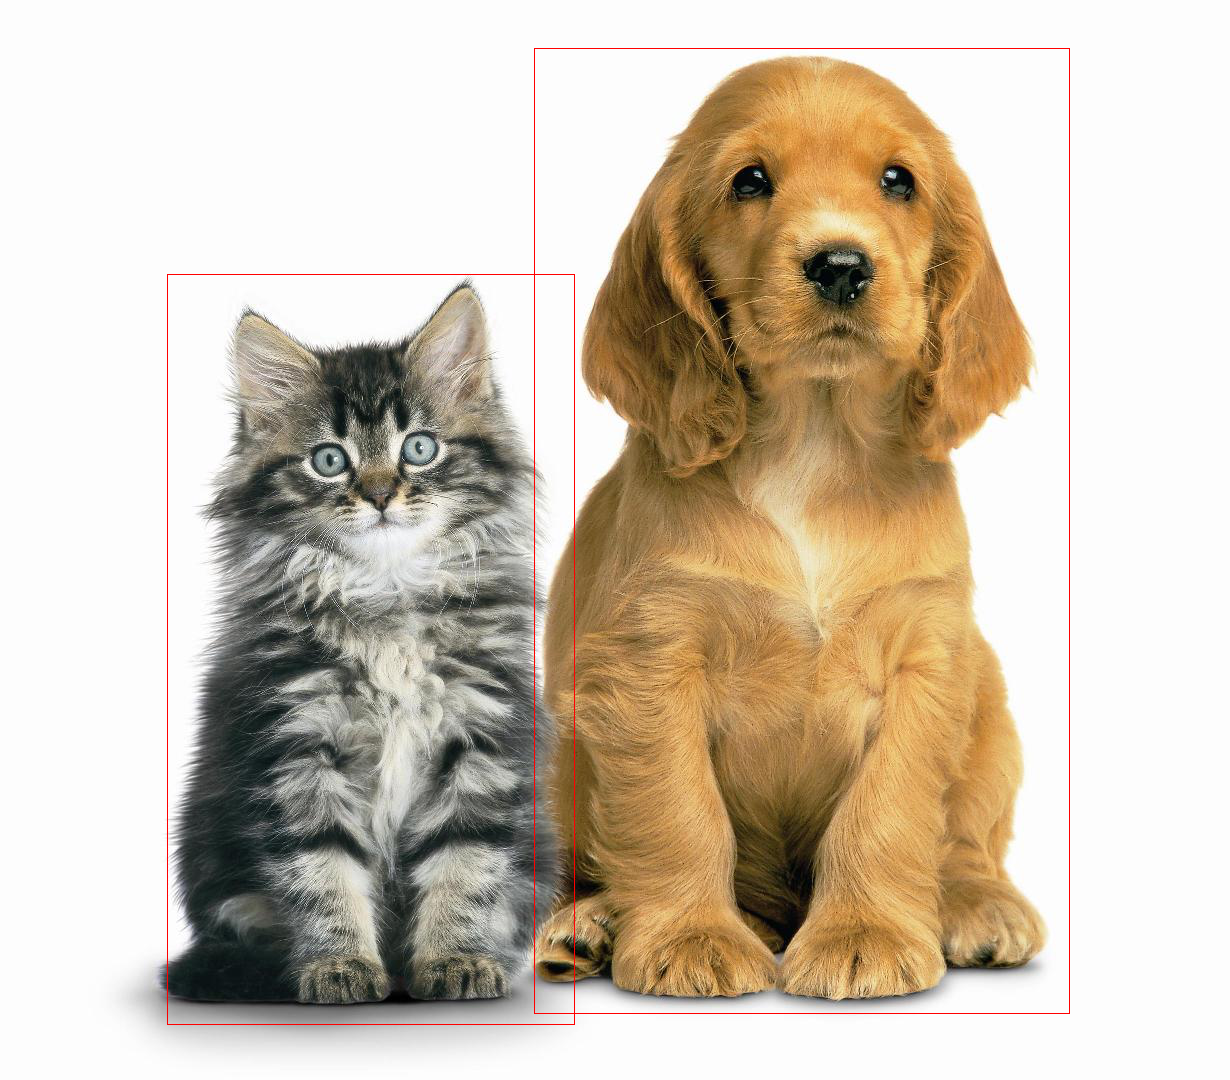

In [31]:
image